/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: Mean Accuracy = 0.956, Std = 0.038
KNN: Mean Accuracy = 0.691, Std = 0.049
SVM: Mean Accuracy = 0.663, Std = 0.046
Decision Tree: Mean Accuracy = 0.882, Std = 0.059
Random Forest: Mean Accuracy = 0.978, Std = 0.021
Naive Bayes: Mean Accuracy = 0.966, Std = 0.021
Gradient Boosting: Mean Accuracy = 0.933, Std = 0.041


/tmp/ipython-input-4262706165.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


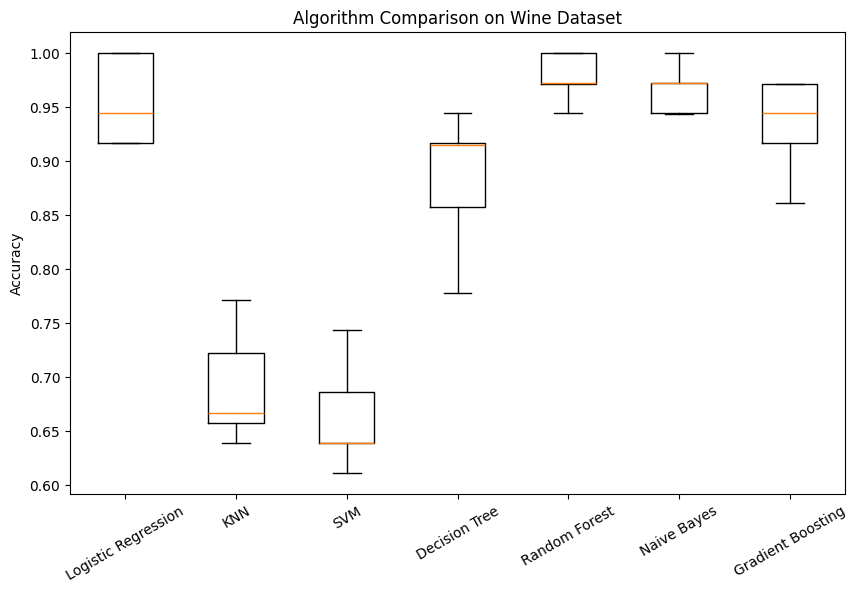


✅ Best Model: Random Forest with Accuracy: 0.9776190476190475


In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Define models to compare
models = []
models.append(("Logistic Regression", LogisticRegression(max_iter=2000)))
models.append(("KNN", KNeighborsClassifier()))
models.append(("SVM", SVC()))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("Random Forest", RandomForestClassifier()))
models.append(("Naive Bayes", GaussianNB()))
models.append(("Gradient Boosting", GradientBoostingClassifier()))

# Evaluate each model using cross-validation
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: Mean Accuracy = {cv_results.mean():.3f}, Std = {cv_results.std():.3f}")

# Boxplot for comparison
plt.figure(figsize=(10,6))
plt.boxplot(results, labels=names)
plt.title("Algorithm Comparison on Wine Dataset")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.show()

# Identify best model
best_index = max(range(len(results)), key=lambda i: results[i].mean())
print("\n✅ Best Model:", names[best_index],
      "with Accuracy:", results[best_index].mean())
